In [7]:
import numpy as np
import pandas as pd 
from xgboost import XGBRegressor 
from sklearn.model_selection import TimeSeriesSplit
import warnings                                  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
from sklearn.preprocessing import StandardScaler
from itertools import product                   
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize         
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from func import select_ts, tscrossvalid, optimizer
from models import HoltWinters, HWM

In [8]:
def main(train, test, seas_am):
    
    data = np.array(train.ACTUAL)
    alpha_final, beta_final, gamma_final = optimizer(data)    
    
    model = HoltWinters(series=data, slen=350, 
                alpha=alpha_final, beta=beta_final, 
                gamma=gamma_final, n_preds=len(test))
    model.triple_exponential_smoothing()
    
    pred = model.result[-len(test):]
    df = pd.Series(pred, index = test.ID)
    return df

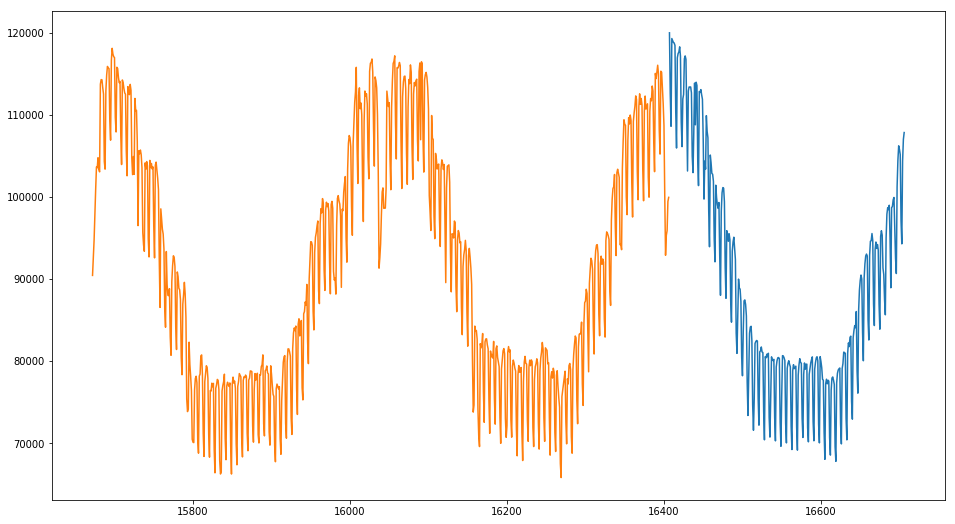

In [9]:
test_prim = None
train_init, test_init = select_ts(1)
test_1 = main(train_init, test_init, 350)
plt.plot(test_1+5500)
plt.plot(train_init.ID, train_init.ACTUAL)

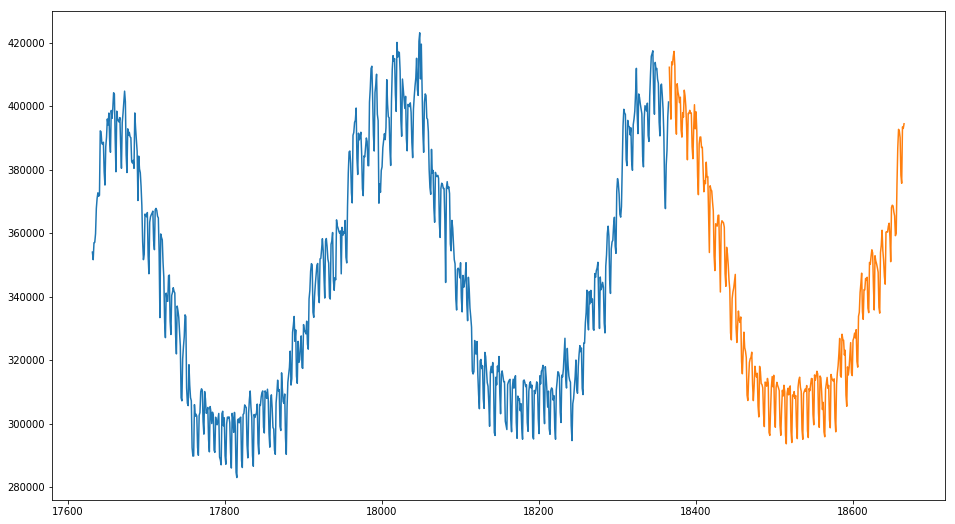

In [10]:
train_2, test_2 = select_ts(2)
plt.plot(train_2.ID, train_2.ACTUAL)
test_2 = main(train_2, test_2, 34)
plt.plot(test_2+3000)

In [11]:
test_prim = test_1
test_prim = test_prim.append(test_2)

In [12]:
for i in range(3, 23):
    print(i)
    seas_am = 365

    train_i, test_i = select_ts(i)
    test_i = main(train_i, test_i, seas_am)
    test_prim = test_prim.append(test_i)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [13]:
helper = pd.read_csv("submission/helper.csv")
ovf = (650*np.array(helper.value) + 450*np.array(test_prim))/(650+450)
ovfx = np.array(test_prim)
dfxx = pd.Series(ovf, index = test_prim.index)
dfx = pd.Series(ovfx, index = test_prim.index)
dfxx.to_csv("submission/primxx.csv")
dfx.to_csv("submission/primx.csv")

In [14]:
def manual_trainer(i, s= 365, alpha = 0.03, beta = 0.007, gamma = 0.1):
    train_i, test_i = select_ts(i)
    model_i = HWM(data = np.array(train_i.ACTUAL),
                 season_amount = s,
                 n_step = 30,
                 alpha= alpha,
                 beta = beta,
                 gamma = gamma)

    pred_i = model_i.smooth()[:300]
    plt.plot(train_i.ID, train_i.ACTUAL)
    plt.plot(test_i.ID, pred_i)
    return pd.Series(pred_i, index = test_i.ID)

def man_test_2(i, d = 0):
    train_i, test_i = select_ts(i)
    test_2 = main(train_i, test_i, 365) + d
    plt.plot(train_i.ID, train_i.ACTUAL)
    plt.plot(test_2)
    return test_2

In [15]:
prim2 = None

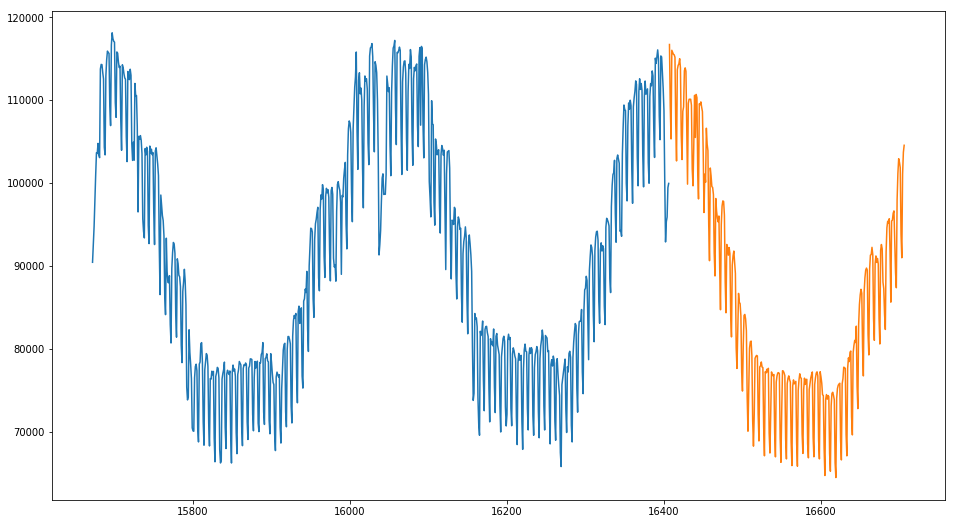

In [16]:
#prim2 = manual_trainer(1, 356, 0.02, 0.835, 0.1)
prim2 = man_test_2(1, 2200)

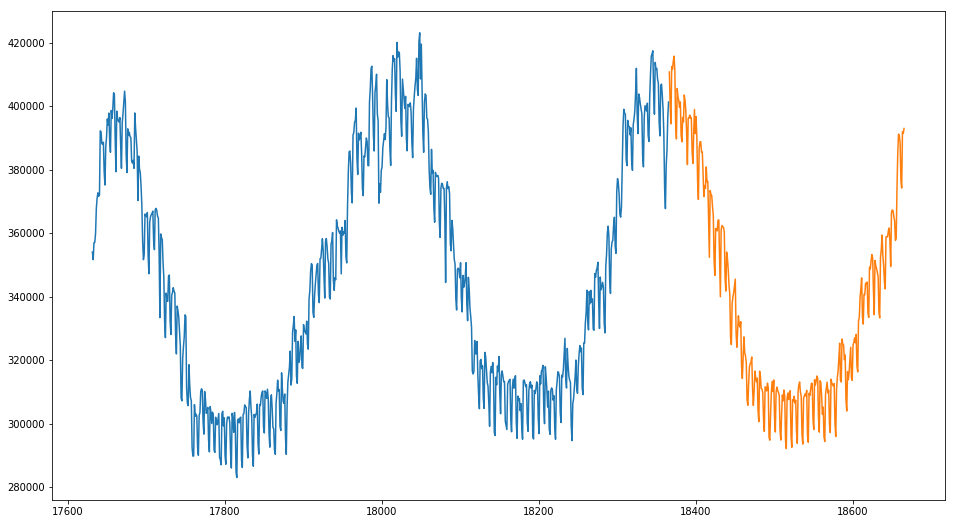

In [17]:
#prim2 = prim2.append(manual_trainer(2))
prim2 = prim2.append(man_test_2(2, 1500))

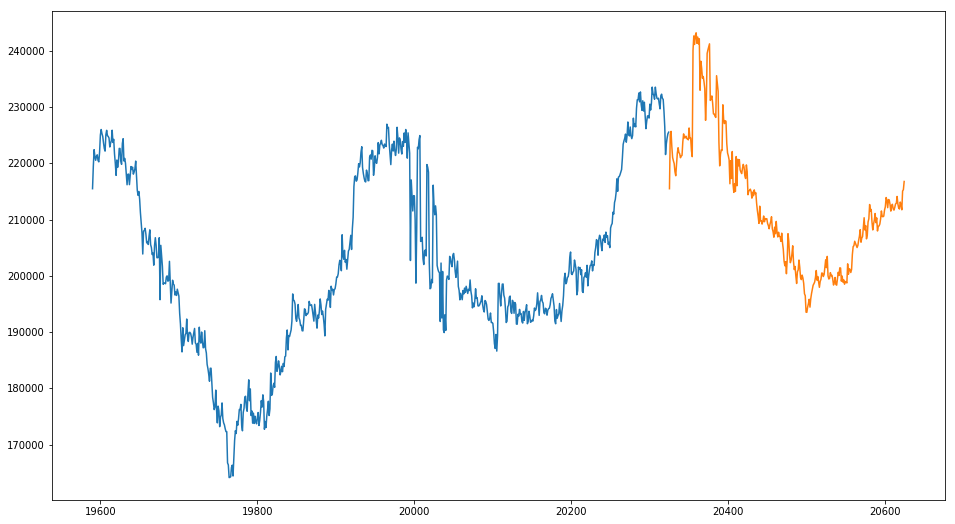

In [18]:
prim2 = prim2.append(manual_trainer(3, 366, 0.2, 0.2, 0.5))
#prim2 = prim2.append(man_test_2(3, -3400))

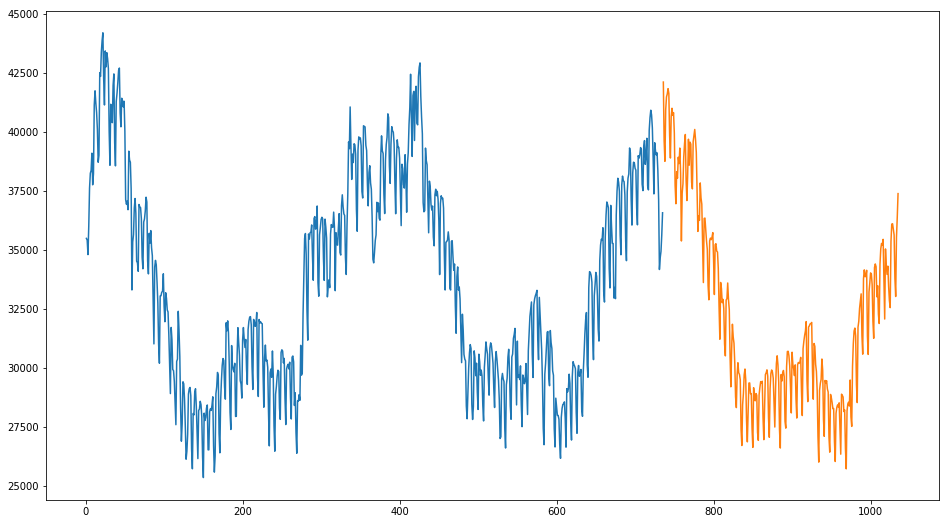

In [19]:
#prim2 = prim2.append(manual_trainer(4, 364, 0.1, 0.053, 0.1))
prim2 = prim2.append(man_test_2(4, 1200))

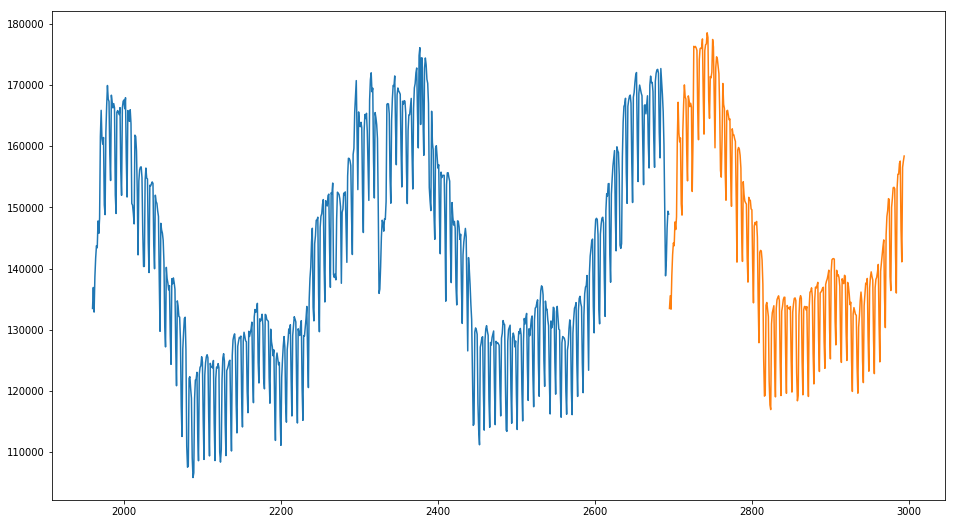

In [20]:
prim2 = prim2.append(manual_trainer(5, 364, 0.78, 0.0493, 0.1))
#prim2 = prim2.append(man_test_2(5, 700))

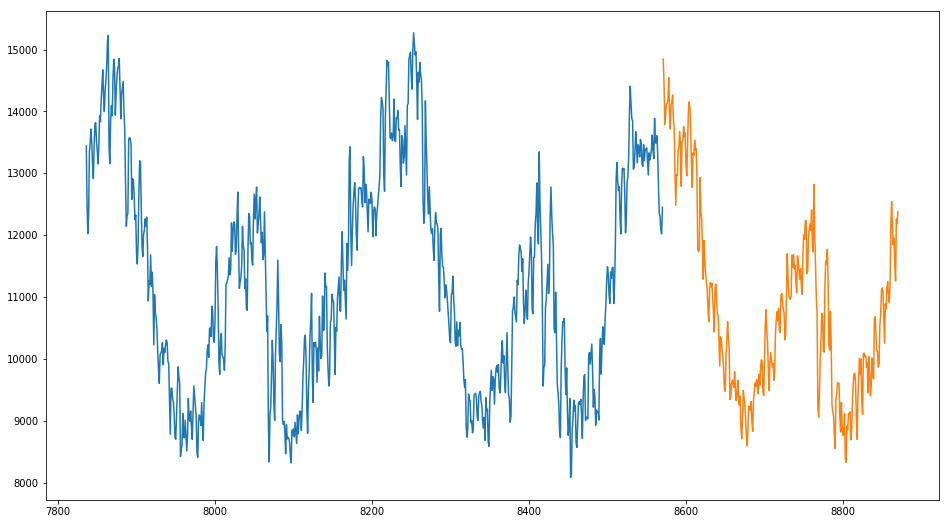

In [21]:
#prim2 = prim2.append(manual_trainer(6, 365, 0.0869, 0.9, 0.2))
prim2 = prim2.append(man_test_2(6))

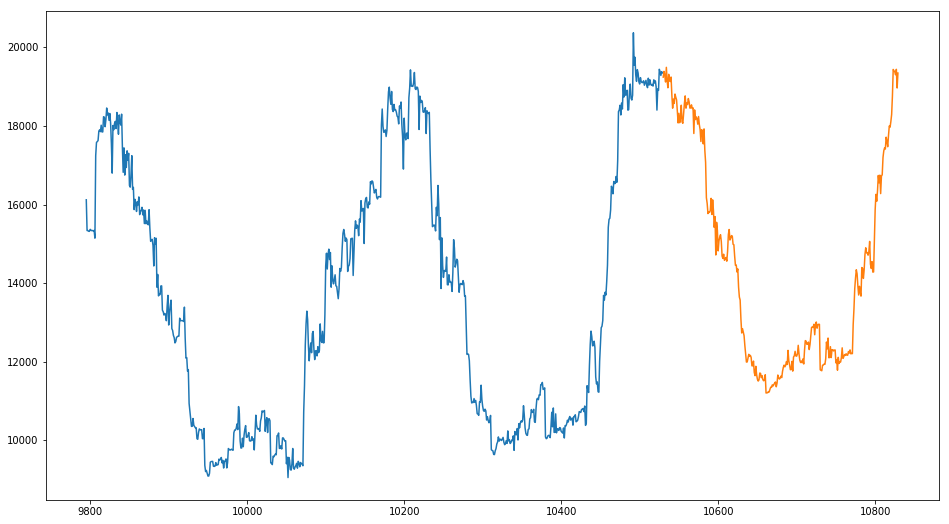

In [22]:
#prim2 = prim2.append(manual_trainer(7, 366, 0.2, 0.0022, 0.1))
prim2 = prim2.append(man_test_2(7, -500))

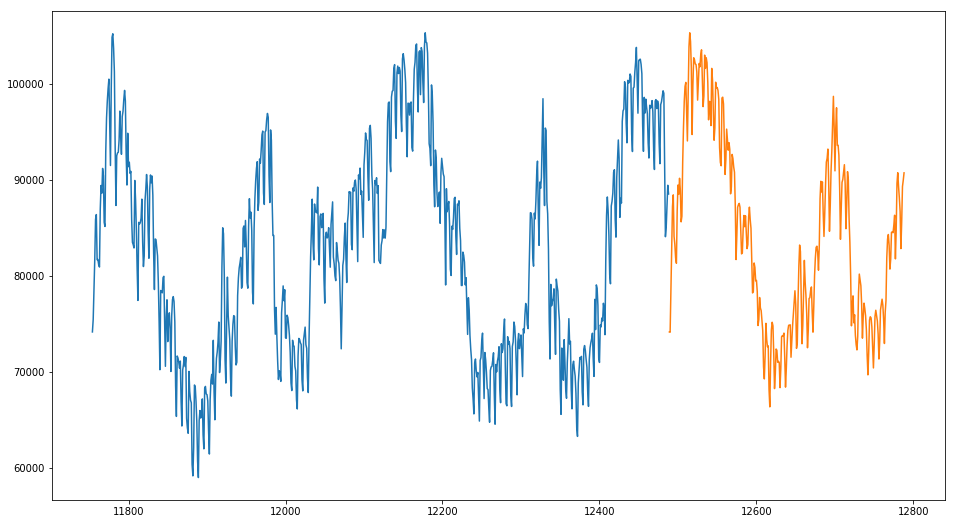

In [23]:
prim2 = prim2.append(manual_trainer(8, 365, 0.5, 0.31, 0.2))
#prim2 = prim2.append(man_test_2(8, 0))

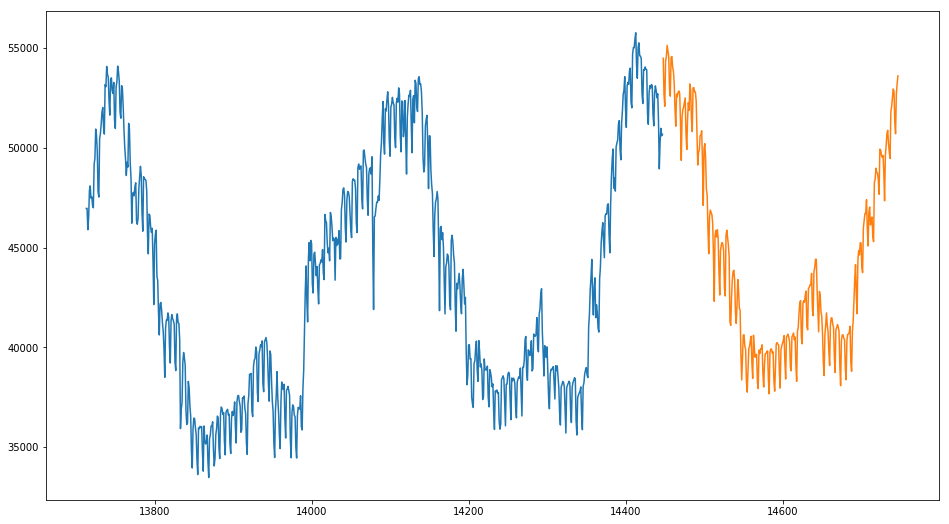

In [24]:
#prim2 = prim2.append(manual_trainer(9, 365, 0.1008, 0.1, 0.2))
prim2 = prim2.append(man_test_2(9, 0))

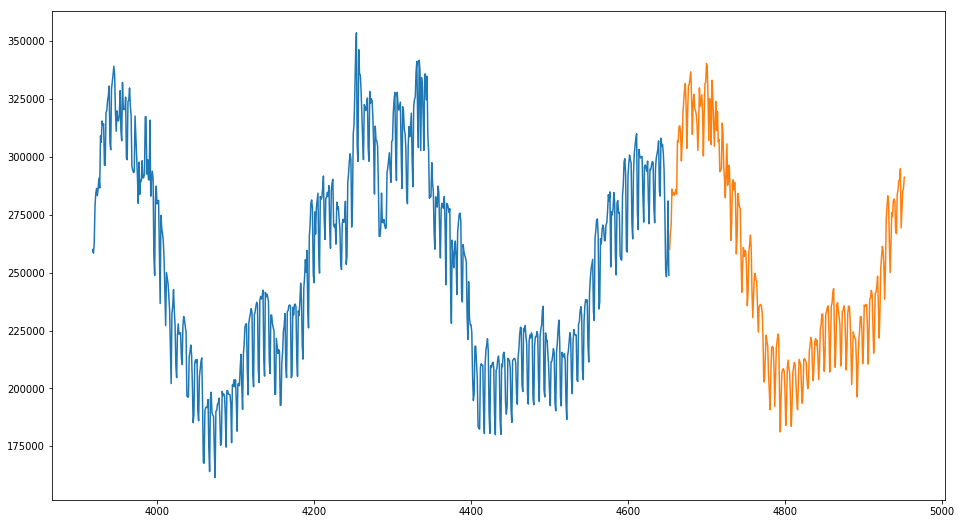

In [25]:
prim2 = prim2.append(manual_trainer(10, 365, 0.02, 0.008, 0.1))
#prim2 = prim2.append(man_test_2(10, 2500))

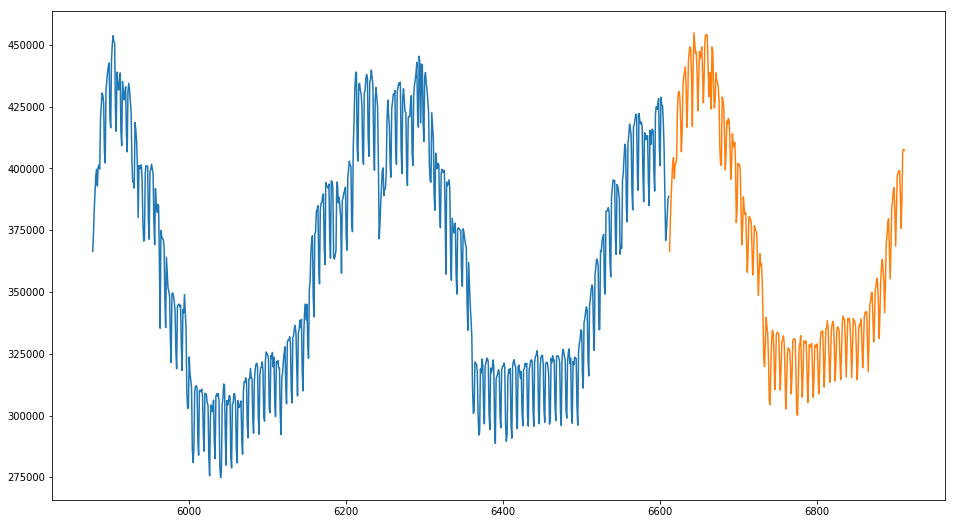

In [26]:
prim2 = prim2.append(manual_trainer(11, 365, 0.002, 0.65, 0.2))

In [27]:
train_12, test_12 = select_ts(12)

In [28]:
test_2 = main(train_12, test_12, 365) +5200

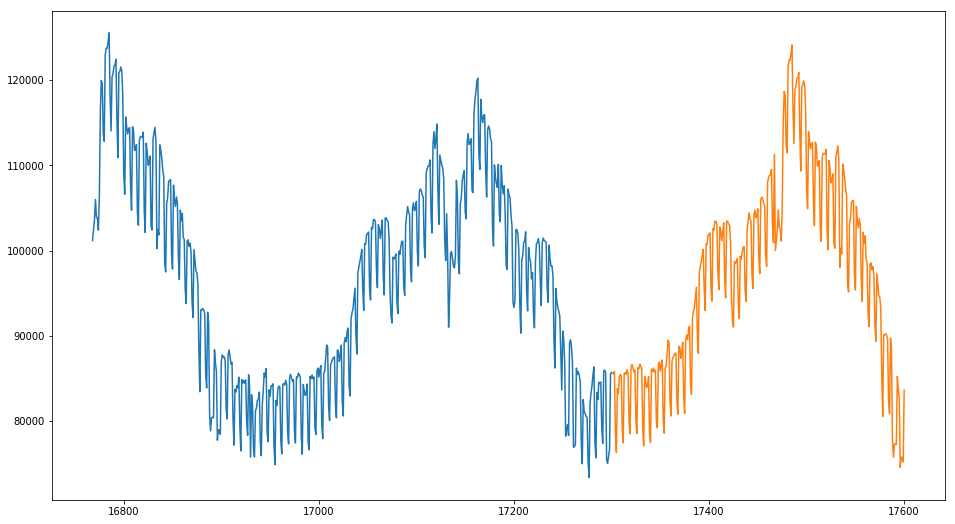

In [29]:
plt.plot(train_12.ID, train_12.ACTUAL)
plt.plot(test_2)

In [30]:
prim2 = prim2.append(test_2)

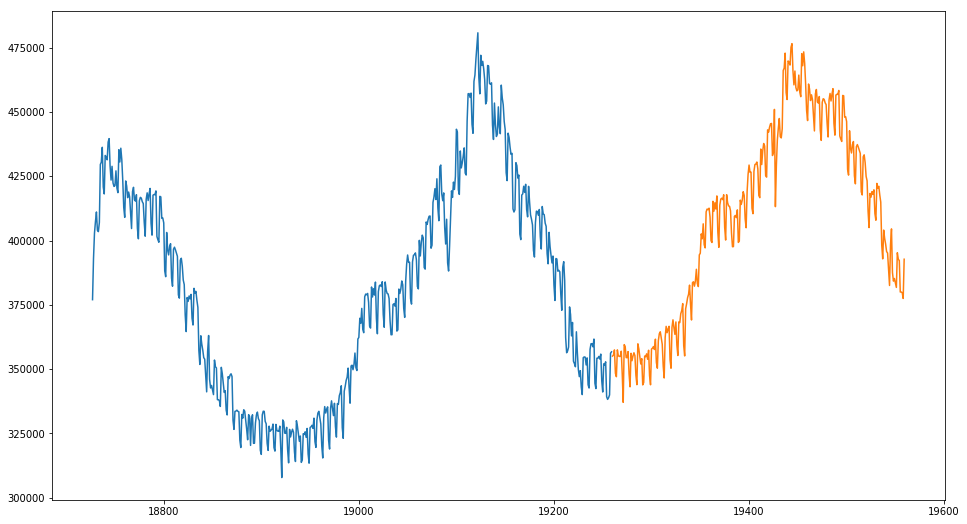

In [31]:
prim2 = prim2.append(man_test_2(13, -5000))

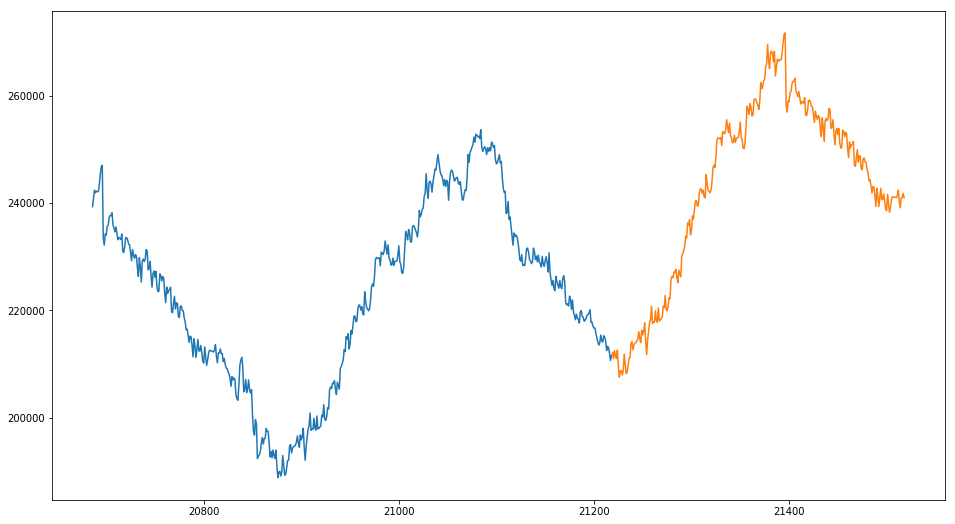

In [32]:
prim2 = prim2.append(man_test_2(14, -500))

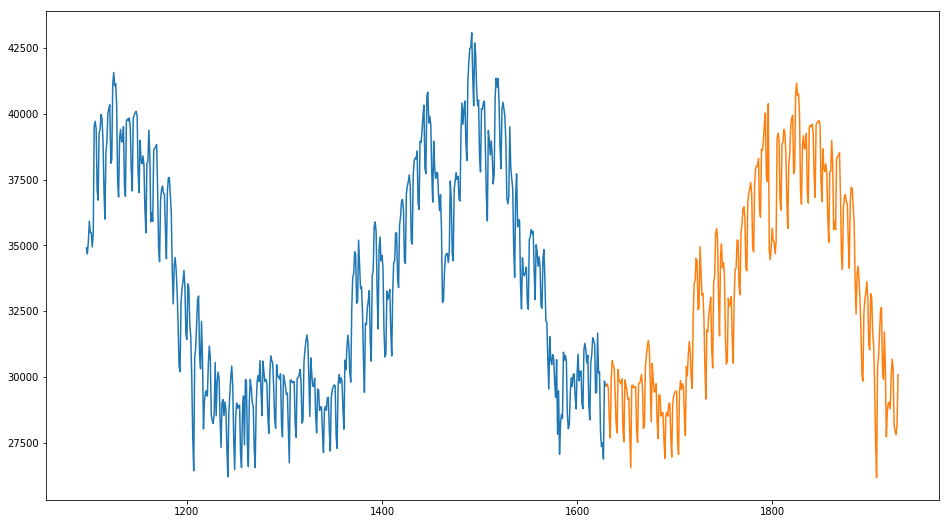

In [33]:
prim2 = prim2.append(man_test_2(15, -850))

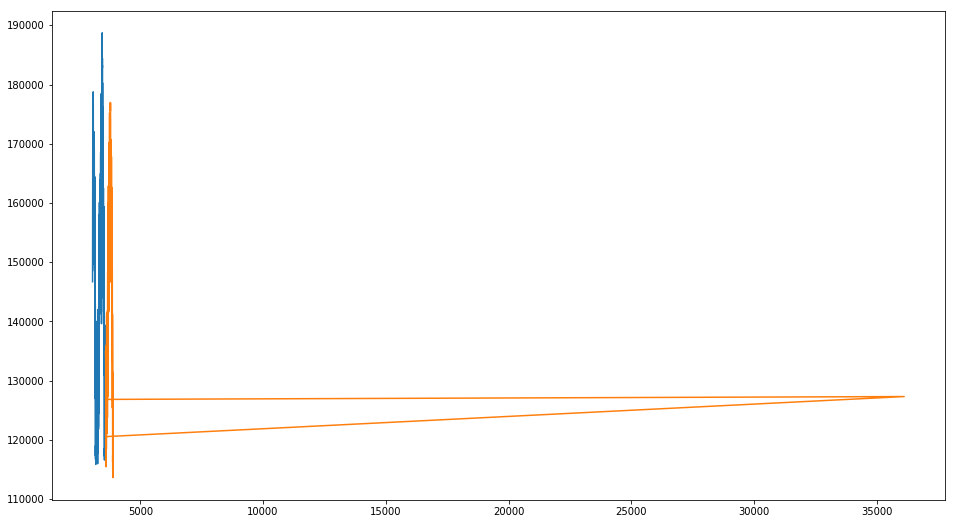

In [34]:
prim2 = prim2.append(man_test_2(16, -1000))

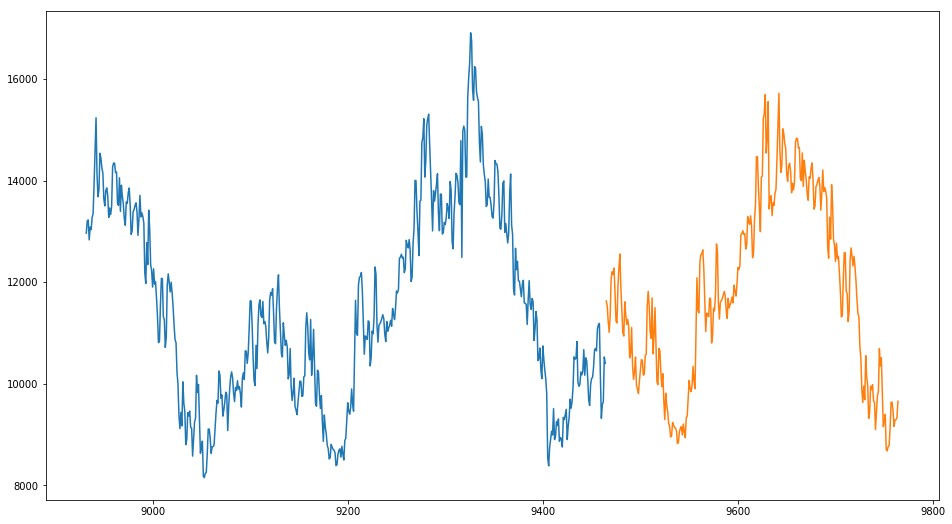

In [35]:
prim2 = prim2.append(man_test_2(17, -1500))

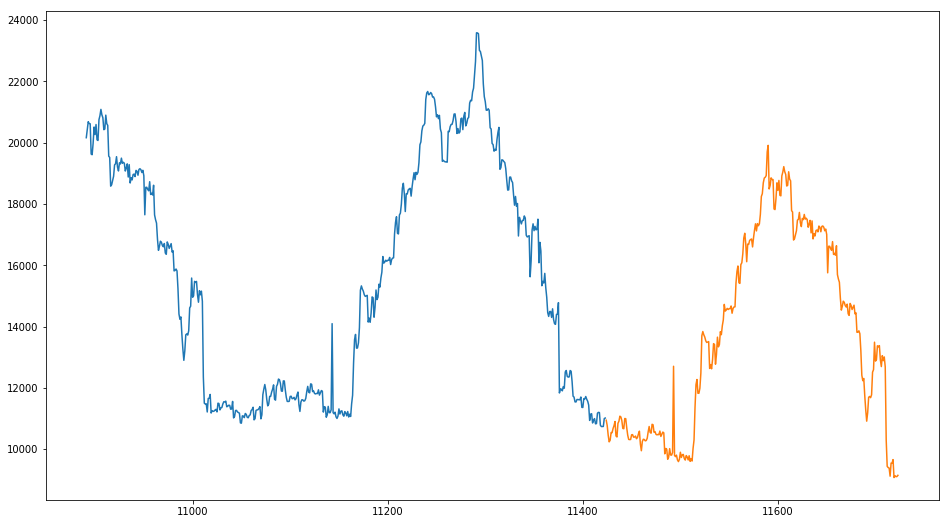

In [36]:
prim2 = prim2.append(man_test_2(18, -1000))

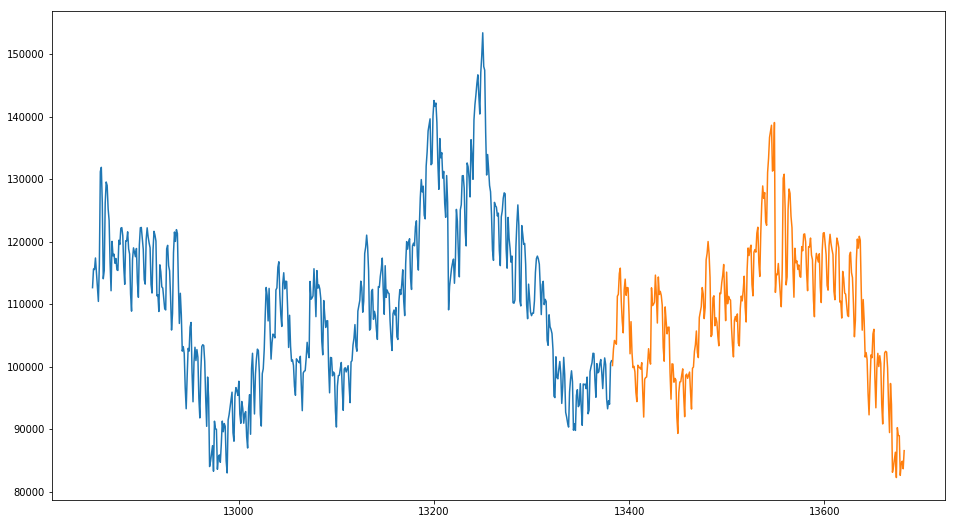

In [37]:
prim2 = prim2.append(man_test_2(19, -5000))

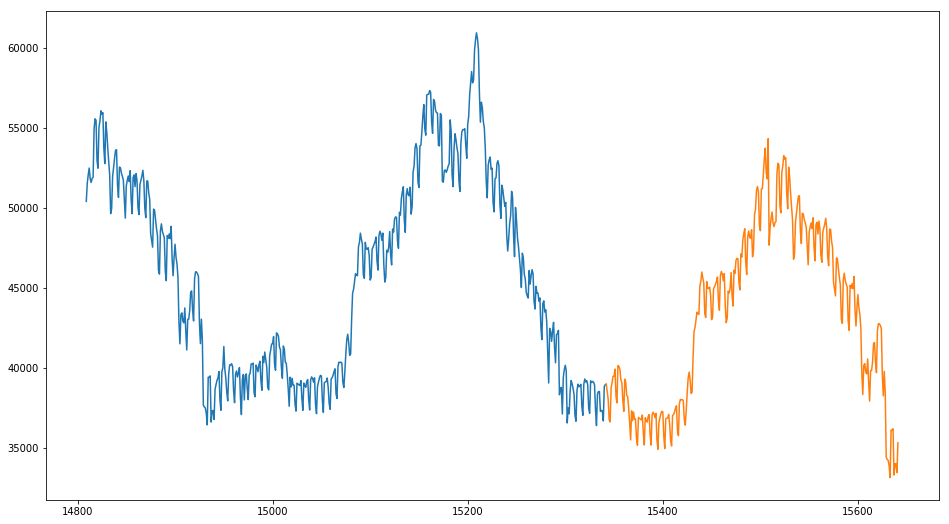

In [38]:
prim2 = prim2.append(man_test_2(20, -600))

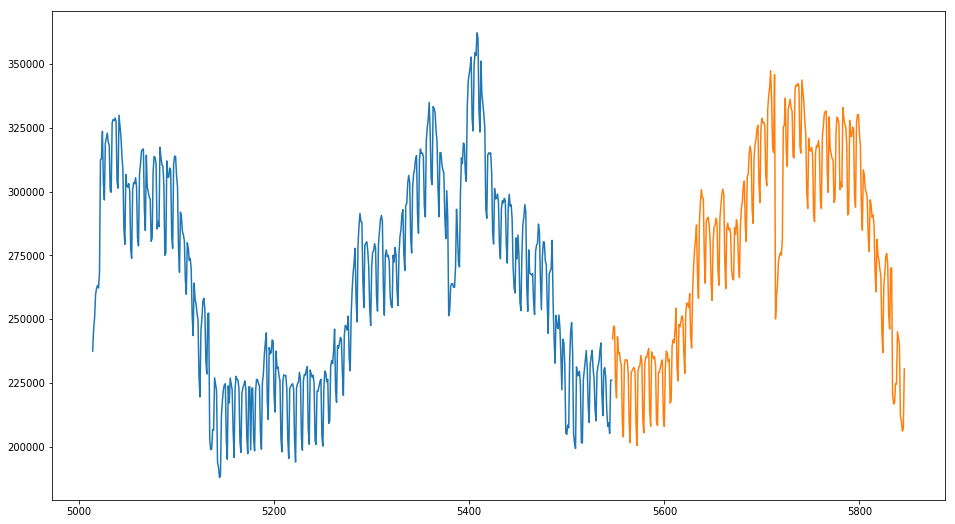

In [39]:
prim2 = prim2.append(man_test_2(21, -19000))

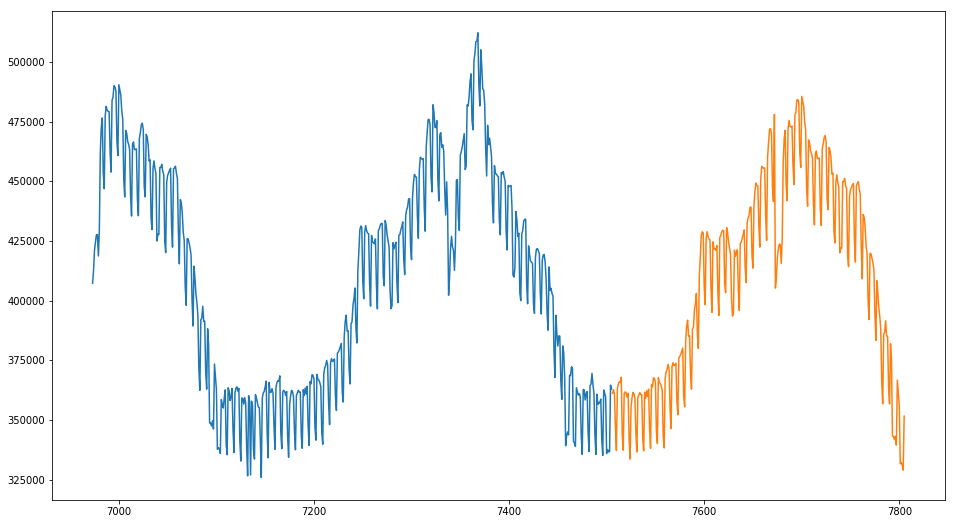

In [40]:
prim2 = prim2.append(man_test_2(22, -1000))

In [44]:
ovf2 = (6*np.array(helper.value) + 
        5*np.array(prim2))/(5+6)
df = pd.Series(ovf2, index = prim2.index)
df.to_csv("submission/prim3.csv")

In [45]:
ovf3 = (7.5*np.array(helper.value) + 3.8*np.array(test_prim) + 5*np.array(prim2))/(3.8+5+7.5)
dfn = pd.Series(ovf3, index = test_prim.index)
dfn.to_csv("submission/prim5.csv")